<a href="https://colab.research.google.com/github/IgorRachev27/Portfolio/blob/main/Classification/%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B8%D0%B5_ds_%D1%87%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### В данной части решено было попробовать разделить датасет на две части таким образом, что в первой части был бы датасет, в который входят ст роки без NAN, а во второй те строки, где присутствуют NAN. И обучить две модели. В конце результат двух моделей объединяется на аналогично разделённом тестовом датасете

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [ ]:
path='https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv'
path2='https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv'
path3='https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv'

In [ ]:
train_df = pd.read_csv(path, sep=';')
test_df = pd.read_csv(path2, sep=';')
desc_df = pd.read_csv(path3, sep=';')

In [ ]:
def encoding(DF):
    encoded_data=DF.copy()
    encoders={}
    for column in encoded_data:
        if encoded_data[column].dtype==object:
            encoders[column]=preprocessing.LabelEncoder()
            encoded_data[column]=encoders[column].fit_transform(encoded_data[column])
    return encoded_data, encoders

<AxesSubplot:title={'center':'нулевые значения в датасете (цветное значение - нулевое)'}>

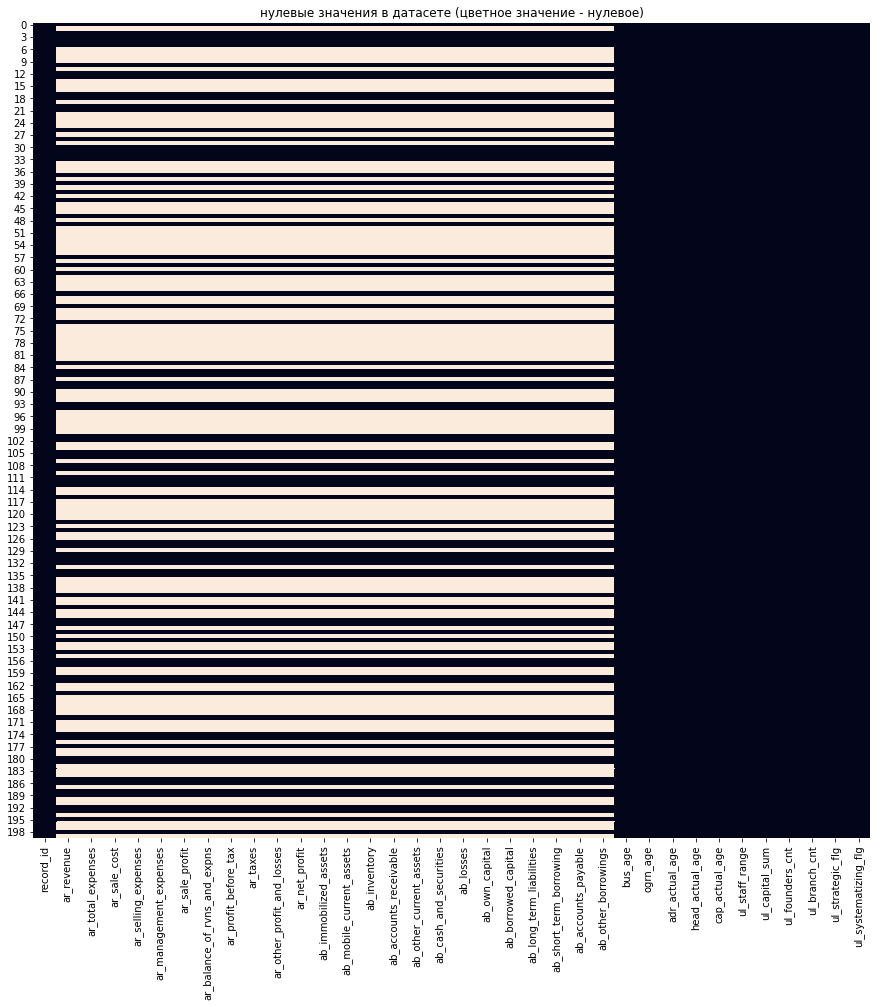

In [ ]:
plt.figure(figsize = (15, 15))
plt.title("нулевые значения в датасете (цветное значение - нулевое)")
plt.xlabel('значение в строке')
plt.ylabel('строка датасета')
sns.heatmap(test_df.isnull(), cbar=False)

In [ ]:
train_df.dropna()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,3,[1-100],50000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,27,[1-100],10000.0,2,0,0,0,0
9,40,125432000.0,122655000.0,122655000.0,0.0,0.0,2777000.0,-63000.0,2714000.0,579000.0,...,15,15,15,(100-500],10000.0,2,0,0,0,0
10,54,59570000.0,59331000.0,59331000.0,0.0,0.0,239000.0,-97000.0,142000.0,38000.0,...,4,4,4,[1-100],10000.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,274557,37527000.0,31627000.0,31627000.0,0.0,0.0,5900000.0,-4906000.0,994000.0,994000.0,...,2,2,2,[1-100],25000.0,1,0,0,0,0
32390,274590,28264000.0,27911000.0,27911000.0,0.0,0.0,353000.0,-68000.0,285000.0,57000.0,...,5,5,5,[1-100],10000.0,1,0,0,0,0
32391,274593,25017000.0,24381000.0,24381000.0,0.0,0.0,636000.0,0.0,636000.0,0.0,...,25,25,25,[1-100],600000.0,1,0,0,0,0
32393,274611,136162000.0,135088000.0,135088000.0,0.0,0.0,1074000.0,-719000.0,355000.0,267000.0,...,13,13,13,(100-500],11000.0,1,0,0,0,1


In [ ]:
encoded_data, encoders= encoding(train_df.dropna())
encoded_data2, encoders2= encoding(test_df.dropna())

In [ ]:
encoded_data['default_12m'][encoded_data['default_12m']==1]

25       1
30       1
111      1
139      1
140      1
        ..
32307    1
32309    1
32358    1
32379    1
32393    1
Name: default_12m, Length: 796, dtype: int64

In [ ]:
import random
rand_df=encoded_data[encoded_data['default_12m']==0].copy()
rand_df=encoded_data.loc[random.sample(list(encoded_data['default_12m'][encoded_data['default_12m']==0].index),encoded_data['default_12m'][encoded_data['default_12m']==1].count())]
rand_df=pd.concat([encoded_data[encoded_data['default_12m']==1], rand_df]).sort_index()
rand_df

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
25,188,44755000.0,42665000.0,42665000.0,0.0,0.0,2090000.0,-405000.0,1685000.0,2000.0,...,1,1,1,2,10000.0,1,0,0,0,1
30,213,23179000.0,22064000.0,22064000.0,0.0,0.0,1115000.0,115000.0,1230000.0,265000.0,...,23,23,23,2,10000.0,1,0,0,0,1
111,815,7190000.0,6857000.0,6857000.0,0.0,0.0,333000.0,0.0,333000.0,0.0,...,2,2,2,2,11000.0,1,0,0,0,1
129,967,247609000.0,221669000.0,221669000.0,0.0,0.0,25940000.0,-525000.0,25415000.0,5083000.0,...,28,28,28,0,8500.0,1,0,0,0,0
139,1047,21919000.0,21317000.0,16106000.0,5211000.0,0.0,602000.0,-158000.0,444000.0,129000.0,...,31,31,31,2,10000.0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32358,274314,229505000.0,221812000.0,221812000.0,0.0,0.0,7693000.0,-4455000.0,3238000.0,648000.0,...,27,27,27,2,12000.0,2,0,0,0,1
32367,274381,272388000.0,269324000.0,263020000.0,6304000.0,0.0,3064000.0,-1687000.0,1377000.0,150000.0,...,6,6,6,0,5400.0,2,0,0,0,0
32379,274494,62309000.0,55829000.0,55829000.0,0.0,0.0,6480000.0,-1257000.0,5223000.0,0.0,...,23,23,23,2,85000.0,1,0,0,0,1
32388,274557,37527000.0,31627000.0,31627000.0,0.0,0.0,5900000.0,-4906000.0,994000.0,994000.0,...,2,2,2,2,25000.0,1,0,0,0,0


In [ ]:
rand_df.value_counts('default_12m')

default_12m
0    796
1    796
dtype: int64

In [ ]:
X=scale(rand_df.drop('default_12m', axis=1))
y=rand_df['default_12m']
X_test=scale(encoded_data2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,np.array(y),
                                                    random_state=42, shuffle=True, test_size=0.2)

### корреляция

<AxesSubplot:>

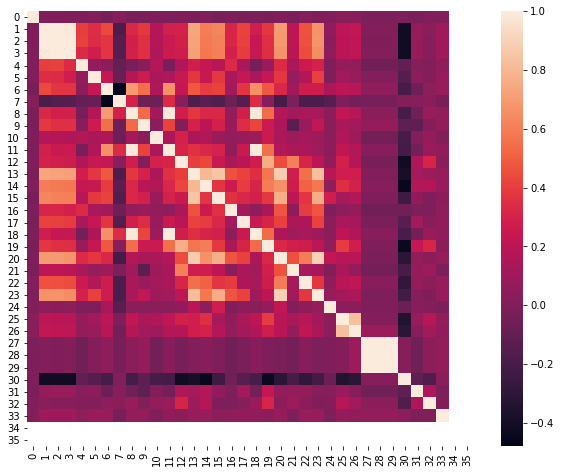

In [ ]:
fig = plt.subplots(figsize=(10,8))    
sns.heatmap(pd.DataFrame(X).corr())

## PCA decomposition+ работа со всеми данными

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
encoded_d, encoder= encoding(train_df.loc[:,'bus_age':'default_12m'])
encoded_d2, encoder2= encoding(test_df.loc[:,'bus_age':'ul_systematizing_flg'])

In [ ]:
rand_df=encoded_d[encoded_d['default_12m']==0].copy()
rand_df=encoded_d.loc[random.sample(list(encoded_d[encoded_d['default_12m']==0].index),encoded_d['default_12m'][encoded_d['default_12m']==1].count())]
rand_df=pd.concat([encoded_d[encoded_d['default_12m']==1], rand_df]).sort_index()
rand_df['default_12m'].value_counts()

0    2091
1    2091
Name: default_12m, dtype: int64

In [ ]:
X_f=scale(rand_df.drop('default_12m', axis=1))
y_f=np.array(rand_df['default_12m'])
X_f_test=scale(encoded_d2)

In [ ]:
X_f.shape

(4182, 11)

In [ ]:
# применяем PCA для наших данных
pca=PCA()
results=pca.fit(X_f)
Z=results.transform(X_f)
Z.shape

(4182, 11)

<AxesSubplot:>

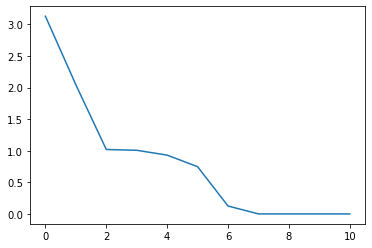

In [ ]:
sns.lineplot(data=results.explained_variance_)

### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
Svc=SVC()
grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gs=GridSearchCV(Svc, grid, cv=5)
gs.fit(X, y)


Svc=SVC(kernel=gs.best_params_['kernel'])

Svc.fit(X_train,y_train)
Svc.score(X_train, y_train)

0.6708562450903378

In [ ]:
a=Svc.predict(X_val)
a

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,

In [ ]:
print('R^2: ', metrics.r2_score(y_val,a))
print('MAE: ',metrics.mean_absolute_error(y_val,a))
print('Test ROC-AUC: ', roc_auc_score(y_val,a))
print(metrics.classification_report(y_val,a))

R^2:  -0.4608764311093567
MAE:  0.36363636363636365
Test ROC-AUC:  0.6472167390446112
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       170
           1       0.58      0.81      0.68       149

    accuracy                           0.64       319
   macro avg       0.66      0.65      0.63       319
weighted avg       0.67      0.64      0.63       319



### SVC с урезанной частью данных

In [ ]:
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_f,np.array(y_f),
                                                    random_state=42, shuffle=True, test_size=0.2)

In [ ]:
X_train_f

array([[ 2.48240481,  1.4674438 ,  0.93206463, ..., -0.05579473,
         0.        ,  0.        ],
       [-0.96592917, -1.17991077, -1.06045578, ..., -0.05579473,
         0.        ,  0.        ],
       [ 0.77970048,  1.4674438 ,  1.24667311, ..., -0.05579473,
         0.        ,  0.        ],
       ...,
       [-0.25050718, -0.09492938,  0.93206463, ..., -0.05579473,
         0.        ,  0.        ],
       [ 2.46809637,  1.48914343,  0.51258665, ..., -0.05579473,
         0.        ,  0.        ],
       [-0.76561101, -0.87611598,  0.51258665, ..., -0.05579473,
         0.        ,  0.        ]])

In [ ]:
Svc=SVC()
grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gs=GridSearchCV(Svc, grid, cv=5)
gs.fit(X_train_f, y_train_f)


Svc=SVC(kernel=gs.best_params_['kernel'])

Svc.fit(X_train_f,y_train_f)
Svc.score(X_train_f, y_train_f)
a=Svc.predict(X_val_f)
a

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [ ]:
print('R^2: ', metrics.r2_score(y_val_f,a))
print('MAE: ',metrics.mean_absolute_error(y_val_f,a))
print('Test ROC-AUC: ', roc_auc_score(y_val_f,a))
print(metrics.classification_report(y_val_f,a))

R^2:  -0.5922183122729245
MAE:  0.3978494623655914
Test ROC-AUC:  0.6017012087836757
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       409
           1       0.61      0.62      0.62       428

    accuracy                           0.60       837
   macro avg       0.60      0.60      0.60       837
weighted avg       0.60      0.60      0.60       837



In [ ]:
svc_preds=Svc.predict(X_f_test)
svc_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

### Catboost

In [ ]:
from catboost import CatBoostClassifier
for learning_rate in [0.03, 0.1, 0.05, 0.6, 0.9]:
    for depth in [4, 10, 12, 16]:
        for l2_leaf_reg in [3, 8, 15]:
         
            # инициализируем модель с перебираемыи параметрами
            model = CatBoostClassifier(iterations=100,
                                      loss_function = 'CrossEntropy',
                                      task_type="CPU",
                                      learning_rate=learning_rate,
                                      depth=depth,
                                      l2_leaf_reg=l2_leaf_reg)
            
            model.fit(X_train, 
                     y_train,
                      eval_set = (X_val, y_val),
                      silent=True,
                      early_stopping_rounds=1000)
            
            preds=model.predict(X_val)
            print('Test ROC-AUC: ', roc_auc_score(y_val, preds), learning_rate, depth, l2_leaf_reg)

Test ROC-AUC:  0.6837939202526647 0.03 4 3
Test ROC-AUC:  0.664488748519542 0.03 4 8
Test ROC-AUC:  0.6569482826687721 0.03 4 15
Test ROC-AUC:  0.6581918673509672 0.03 10 3
Test ROC-AUC:  0.6829648637978681 0.03 10 8
Test ROC-AUC:  0.6665613896565338 0.03 10 15
Test ROC-AUC:  0.702724042637189 0.03 12 3
Test ROC-AUC:  0.6750098697197 0.03 12 8
Test ROC-AUC:  0.6829648637978681 0.03 12 15
Test ROC-AUC:  0.6871496249506512 0.03 16 3


KeyboardInterrupt: 

In [ ]:
for learning_rate in [0.05]:
    for depth in [13]:
        for l2_leaf_reg in [15]:
         
            # инициализируем модель с перебираемыи параметрами
            model = CatBoostClassifier(iterations=100,
                                      loss_function = 'CrossEntropy',
                                      task_type="CPU",
                                      learning_rate=learning_rate,
                                      depth=depth,
                                      l2_leaf_reg=l2_leaf_reg)
            
            model.fit(X_train, 
                     y_train,
                      eval_set = (X_val, y_val),
                      silent=True,
                      early_stopping_rounds=1000)
            
            preds=model.predict(X_val)
            print('Test ROC-AUC: ', roc_auc_score(y_val, preds), learning_rate, depth, l2_leaf_reg)

Test ROC-AUC:  0.67749703908409 0.05 13 15


In [ ]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
part1=pd.DataFrame(data=model.predict(X_test), index=encoded_data2['record_id'])
part1 = part1.rename(columns={0:'predict'})
part1

,predict
record_id,
196,0
2813,0
4385,1
6479,0
6726,1
...,...
260260,0
263728,0
264010,1


### Catboost full

In [ ]:
for learning_rate in [0.1]:
    for depth in [12]:
        for l2_leaf_reg in [14]:
         
            # инициализируем модель с перебираемыи параметрами
            model = CatBoostClassifier(iterations=100,
                                      loss_function = 'CrossEntropy',
                                      task_type="CPU",
                                      learning_rate=learning_rate,
                                      depth=depth,
                                      l2_leaf_reg=l2_leaf_reg)
            
            model.fit(X_train_f, 
                     y_train_f,
                      eval_set = (X_val_f, y_val_f),
                      silent=True,
                      early_stopping_rounds=1000)
            
            preds=model.predict(X_val_f)
            print('Test ROC-AUC: ', roc_auc_score(y_val_f, preds), learning_rate, depth, l2_leaf_reg)

Test ROC-AUC:  0.6217781002216484 0.1 12 14


# файл с ответом

In [ ]:
answ_df = test_df[['record_id']]

In [ ]:
answ_df['id'] = answ_df['record_id']

In [ ]:
answ_df.drop('record_id',axis=1, inplace=True)

In [ ]:
cutoff = y_train.mean()

In [ ]:
answ_df['predict'] = model.predict(scale(encoded_d2))

In [ ]:
answ_df['predict'] = Svc.predict(scale(encoded_d2))

In [ ]:
answ_df

,id,predict
0,196,0
1,1196,0
2,2813,0
3,4385,0
4,6479,0
...,...,...
195,265577,0
196,266648,0
197,266849,1
198,267566,0


In [ ]:
answ_df['predict'].value_counts()

0    107
1     93
Name: predict, dtype: int64

### для ансамблей

In [ ]:
answ_df=answ_df.set_index('id')

In [ ]:
for i in part1.index:
    answ_df.loc[i]=part1.loc[i]

In [ ]:
answ_df.value_counts()

predict
1          113
0           87
dtype: int64

In [ ]:
answ_df=answ_df.reset_index()
answ_df

,id,predict
0,196,0
1,1196,0
2,2813,0
3,4385,1
4,6479,0
...,...,...
195,265577,0
196,266648,0
197,266849,1
198,267566,0


In [ ]:
answ_df.to_csv('PD-submit.csv',index=False, sep=';')